Prepare the data

In [19]:
#Importing the libraries
import pandas as pd
import numpy as np

#loading the Titanic data into a pandas DataFrame
data = pd.read_csv('titanic3.csv')

#replacing data with '?' for NaN an updating the data type for column 'age'
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<Axes: xlabel='pclass', ylabel='age'>

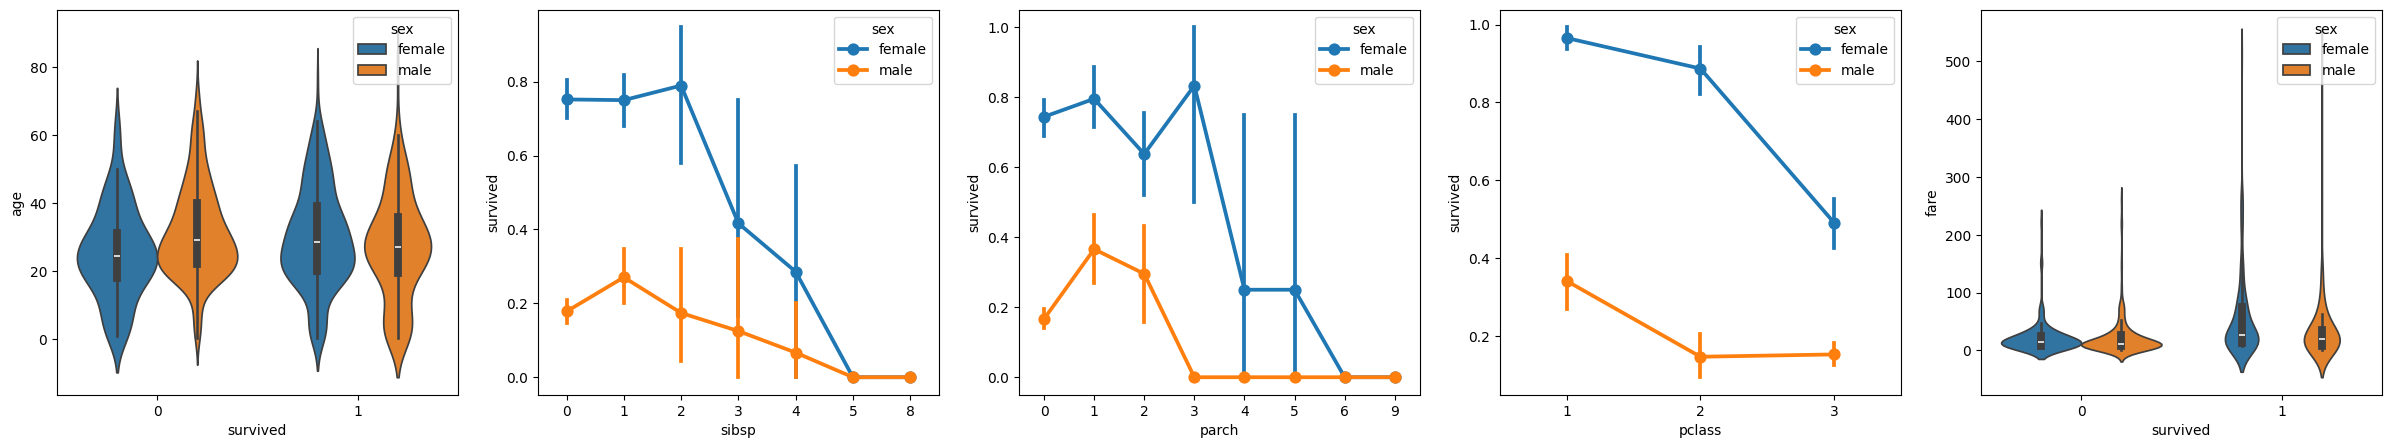

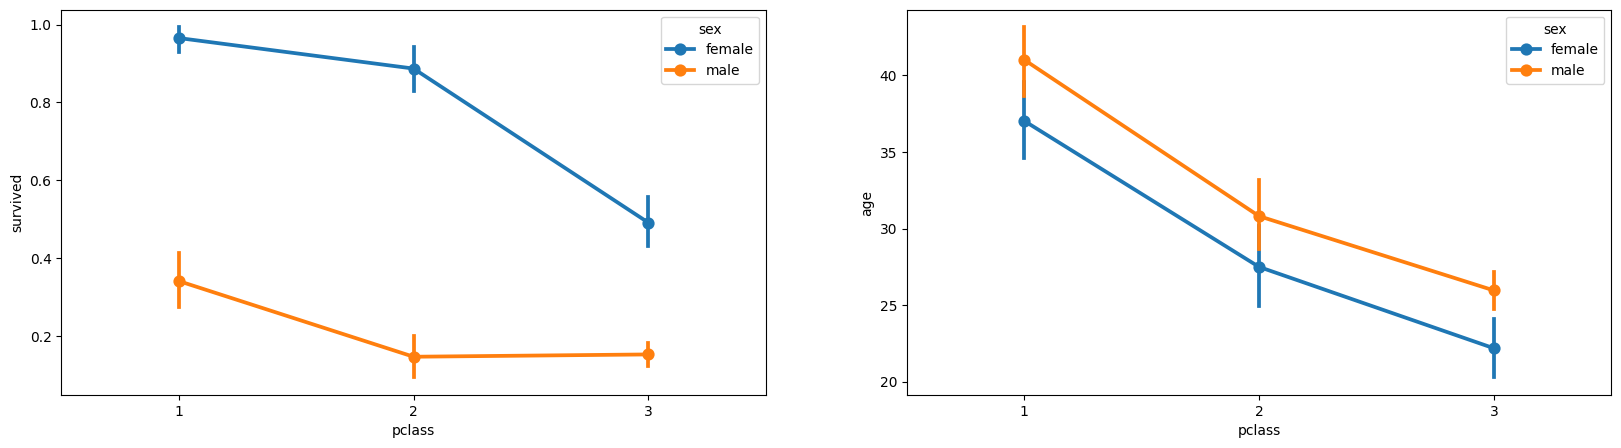

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

#
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

fig, axs = plt.subplots(ncols=2, figsize=(20,5))
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="pclass", y="age", hue="sex", data=data, ax=axs[1])

In [21]:
#converting the categorical data into numerical data
data.replace({'male': 1, 'female': 0}, inplace=True)

#create a new  olumn 'relatives' to about the existence of relatives on board
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)

#getting the correlation of the data
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [22]:
#dropping the columns that are not needed, by leaving only the columns that are needed
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

Train and evaluate the data

In [23]:
from sklearn.model_selection import train_test_split

#splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#normalizing the data
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [27]:
from sklearn.naive_bayes import GaussianNB

#creating the model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [28]:
from sklearn import metrics

#predicting the accuracy of the model
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


Use a Neural Network


In [29]:
from keras.models import Sequential
from keras.layers import Dense

#creating the model
model = Sequential()

In [32]:
#create layers for the model
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
 dense_3 (Dense)             (None, 5)                 10        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
 dense_6 (Dense)             (None, 5)                 1

In [33]:
#building the model
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)


Epoch 1/50


27/27 [==============================] - 1s 3ms/step - loss: 0.6923 - accuracy: 0.5861
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5861
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5861
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5861
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5861
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5861
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5861
Epoch 11/50
27/2